<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/keras/Model_9%20with%20real%20image%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
print(tf.__version__)

2.4.1


In [87]:
#fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist = tf.keras.datasets.mnist

In [88]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [89]:
len(train_images),  len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

In [90]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [91]:
train_images = train_images/255
test_images = test_images/255

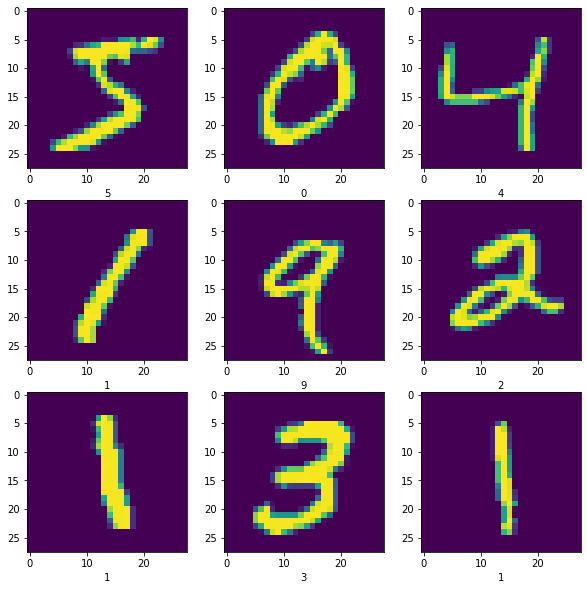

In [92]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names = ['0', '1', '2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])


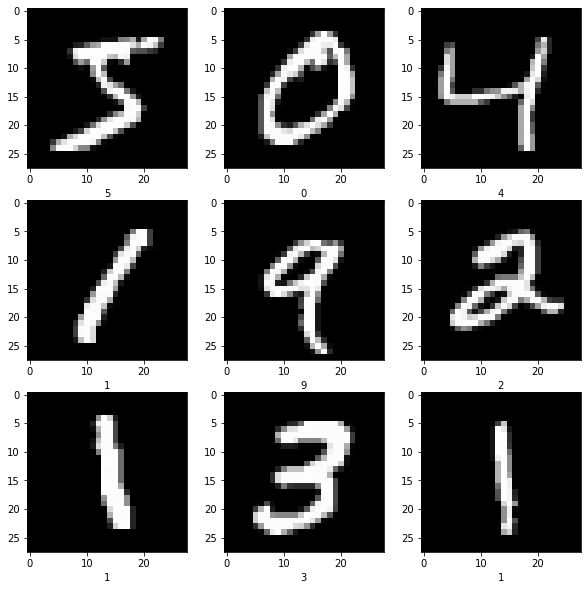

In [93]:
class_names = ['0', '1', '2','3','4','5','6','7','8','9']
#class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i], cmap= 'gray')
  plt.xlabel(class_names[train_labels[i]])


In [94]:
from sklearn.model_selection import train_test_split

training_images, validating_images, training_labels, validating_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 12345)

In [95]:
len(training_images),  len(training_labels), len(validating_images), len(validating_labels), len(test_images), len(test_labels)

(48000, 48000, 12000, 12000, 10000, 10000)

In [96]:
print(training_images.shape)
print(training_labels.shape)
print(validating_images.shape)

(48000, 28, 28)
(48000,)
(12000, 28, 28)


In [97]:
cnn_model = models.Sequential()


cnn_model.add(Conv2D(64, (5, 5), input_shape = (28,28,1), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(82, (5, 5), input_shape = (28,28,1), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(60, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 130, activation = 'relu'))
cnn_model.add(Dense(units = 80, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [98]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 82)          131282    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 82)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 82)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 60)         

In [99]:
#optm = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [100]:
# * unpack the tuple
training_images = training_images.reshape(training_images.shape[0], *(28, 28, 1))
#test_images = test_images.reshape(test_images.shape[0], *(28, 28, 1))
url = "/content/hand 5.png"
#test_image = url.reshape(url.shape[0], *(28, 28, 1))
validating_images = validating_images.reshape(validating_images.shape[0], *(28, 28, 1))

In [101]:
epochs = 70

history = cnn_model.fit(training_images, training_labels, batch_size = 100, epochs = epochs,
                        verbose = 1, validation_data = (validating_images, validating_labels))
#history = cnn_model.fit(X_train, y_train, batch_size = 100, epochs = epochs,
 #                       verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/70
480/480 [==============================] - 7s 13ms/step - loss: 0.8735 - accuracy: 0.6990 - val_loss: 0.0756 - val_accuracy: 0.9784
Epoch 2/70
480/480 [==============================] - 6s 12ms/step - loss: 0.1198 - accuracy: 0.9644 - val_loss: 0.0506 - val_accuracy: 0.9865
Epoch 3/70
480/480 [==============================] - 6s 12ms/step - loss: 0.0858 - accuracy: 0.9732 - val_loss: 0.0443 - val_accuracy: 0.9858
Epoch 4/70
480/480 [==============================] - 6s 12ms/step - loss: 0.0653 - accuracy: 0.9810 - val_loss: 0.0411 - val_accuracy: 0.9881
Epoch 5/70
480/480 [==============================] - 6s 12ms/step - loss: 0.0561 - accuracy: 0.9843 - val_loss: 0.0357 - val_accuracy: 0.9889
Epoch 6/70
480/480 [==============================] - 6s 12ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0330 - val_accuracy: 0.9910
Epoch 7/70
480/480 [==============================] - 6s 12ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0333 - val_accuracy: 0.9920

(37, 43, 3)


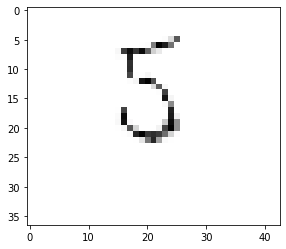

In [102]:
import matplotlib.pyplot as plt

an_image = plt.imread("/content/hand 5.png")
plt.imshow(an_image)
print(an_image.shape)

(37, 43)


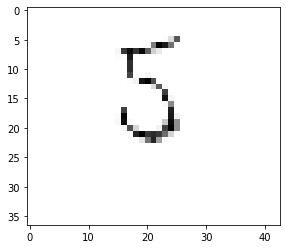

In [103]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(an_image[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))
print(grayscale_image.shape)

In [113]:
import cv2
image=cv2.resize(grayscale_image,(28,28))
print(image.shape)

(28, 28)


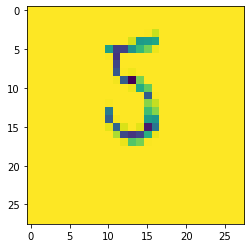

In [114]:
plt.imshow(image)

predicted_classes = cnn_model.predict_classes(image)
predicted_classes

In [129]:
#sample_shape = input_train[0].shape

sample_shape = image.shape
img_width, img_height = sample_shape[0], sample_shape[1]
input_shape = (img_width, img_height, 1)

# Reshape data 
#input_train = input_train.reshape(len(input_train), input_shape[0], input_shape[1], input_shape[2])
# input_test  = image.reshape(len(image), input_shape[0], input_shape[1], input_shape[2])
input_test  = image.reshape(input_shape[2], input_shape[2],len(image), input_shape[0])

In [130]:
input_test.shape

(1, 1, 28, 28)

In [138]:
cnn_model.predict(image)

ValueError: ignored

In [63]:
evaluation = cnn_model.evaluate(test_images, test_labels)
print(f'Test Accuracy : {evaluation[1]:.3f}')

ValueError: ignored

In [137]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(test_images)
predicted_classes

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: ignored

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


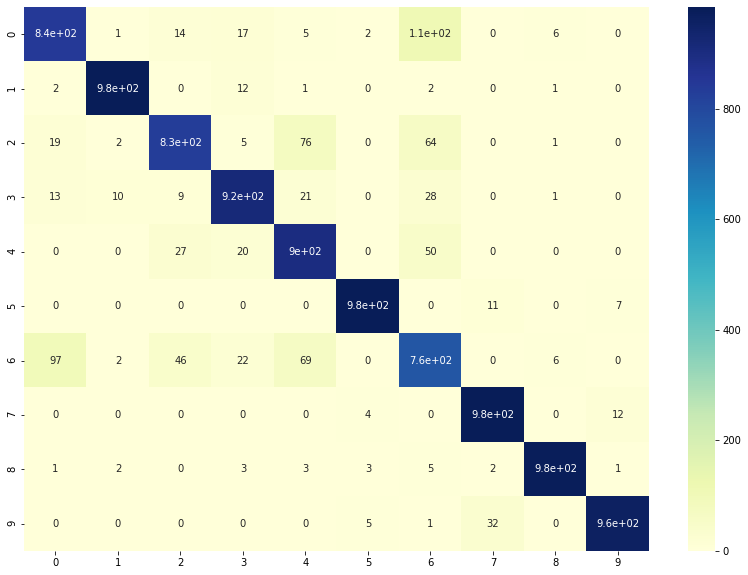

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, cmap ="YlGnBu", annot= True )
# Sum the diagonal element to get the total true correct values

In [ ]:
cm

array([[842,   1,  14,  17,   5,   2, 113,   0,   6,   0],
       [  2, 982,   0,  12,   1,   0,   2,   0,   1,   0],
       [ 19,   2, 833,   5,  76,   0,  64,   0,   1,   0],
       [ 13,  10,   9, 918,  21,   0,  28,   0,   1,   0],
       [  0,   0,  27,  20, 903,   0,  50,   0,   0,   0],
       [  0,   0,   0,   0,   0, 982,   0,  11,   0,   7],
       [ 97,   2,  46,  22,  69,   0, 758,   0,   6,   0],
       [  0,   0,   0,   0,   0,   4,   0, 984,   0,  12],
       [  1,   2,   0,   3,   3,   3,   5,   2, 980,   1],
       [  0,   0,   0,   0,   0,   5,   1,  32,   0, 962]])

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(test_labels, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.84      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.90      0.83      0.86      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.84      0.90      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.74      0.76      0.75      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



ValueError: ignored

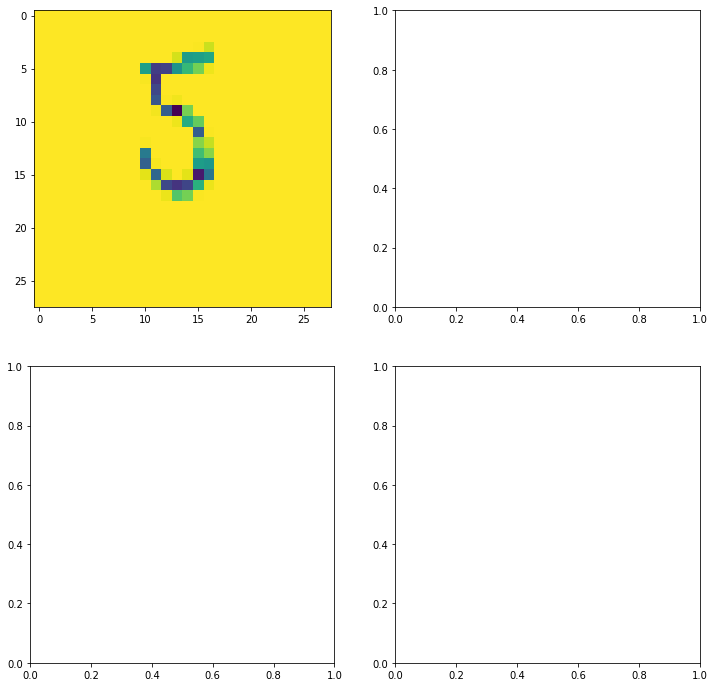

In [136]:
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(image.reshape(28,28))
    axes[i].set_title(f"Prediction Class = {class_names[i]:0.1f}\n True Class = {test_labels[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.8)

In [ ]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
xc=range(70)

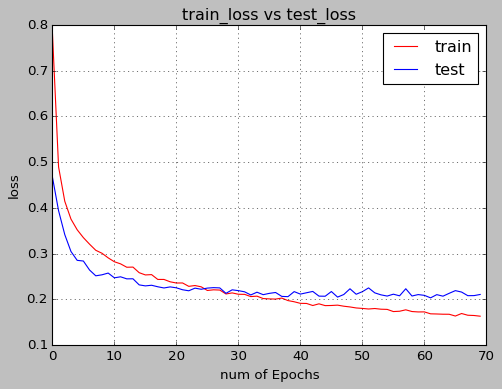

In [ ]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss, 'r')
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs test_loss', )
plt.grid(True)
plt.legend(['train','test'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


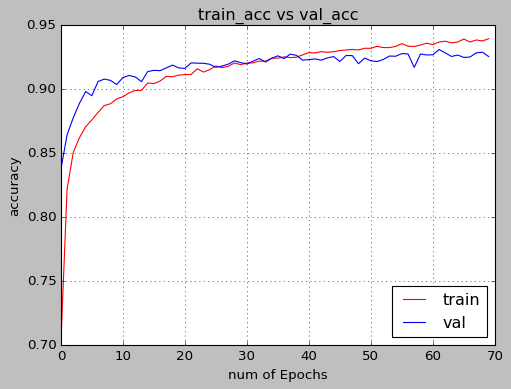

In [ ]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc,'r')
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])